In [10]:
prices_a = [8.7, 8.91, 8.71]

In [11]:
8.91/8.7 - 1

0.024137931034482918

In [12]:
prices_a[1:]

[8.91, 8.71]

In [13]:
prices_a[:-1]

[8.7, 8.91]

In [14]:
import numpy as np

In [15]:
prices_a = np.array([8.7, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [16]:
prices_a[:1]/prices_a[:-1] - 1

array([ 0.        , -0.02356902])

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame({"BLUE": [8.7, 8.91, 8.71, 8.43, 8.73]
                   ,
                   "RED": [10.66, 7.2, 6.8, 9.34, 7.4]
})
df

,BLUE,RED
0,8.70,10.66
1,8.91,7.20
2,8.71,6.80
3,8.43,9.34
4,8.73,7.40


In [19]:
df.iloc[1:]

,BLUE,RED
1,8.91,7.20
2,8.71,6.80
3,8.43,9.34
4,8.73,7.40


In [20]:
df/df.shift(1)

,BLUE,RED
0,NaN,NaN
1,1.024138,0.675422
2,0.977553,0.944444
3,0.967853,1.373529
4,1.035587,0.792291


In [21]:
df/df.shift(1) - 1

,BLUE,RED
0,NaN,NaN
1,0.024138,-0.324578
2,-0.022447,-0.055556
3,-0.032147,0.373529
4,0.035587,-0.207709


In [22]:
df.pct_change()

,BLUE,RED
0,NaN,NaN
1,0.024138,-0.324578
2,-0.022447,-0.055556
3,-0.032147,0.373529
4,0.035587,-0.207709


In [23]:
df = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv")
df

FileNotFoundError: [Errno 2] File Portfolios_Formed_on_ME_monthly_EW.csv does not exist: 'Portfolios_Formed_on_ME_monthly_EW.csv'

In [24]:
returns = df.pct_change()
returns

,BLUE,RED
0,NaN,NaN
1,0.024138,-0.324578
2,-0.022447,-0.055556
3,-0.032147,0.373529
4,0.035587,-0.207709


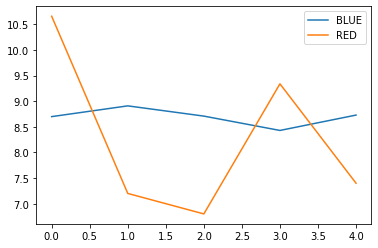

In [25]:
df.plot()

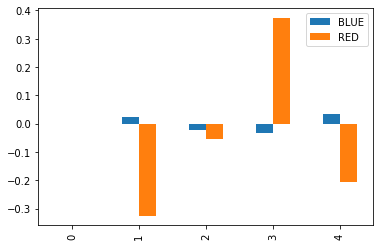

In [26]:
returns.plot.bar()

In [27]:
returns.head()

,BLUE,RED
0,NaN,NaN
1,0.024138,-0.324578
2,-0.022447,-0.055556
3,-0.032147,0.373529
4,0.035587,-0.207709


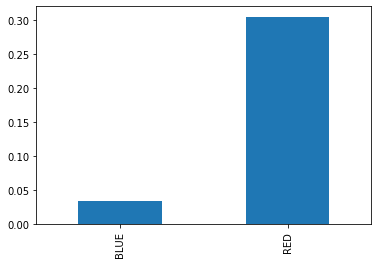

In [28]:
stdev = returns.std()
stdev.plot.bar()

In [29]:
returns.mean()

BLUE    0.001283
RED    -0.053578
dtype: float64

In [30]:
returns

,BLUE,RED
0,NaN,NaN
1,0.024138,-0.324578
2,-0.022447,-0.055556
3,-0.032147,0.373529
4,0.035587,-0.207709


In [22]:
v = returns + 1

In [23]:
np.prod(v) - 1

BLUE    0.003448
RED    -0.305816
dtype: float64

## Annualization

In [24]:
rm = 0.01
(1 + rm) ** 12

1.1268250301319698

In [25]:
# Annualized Quarter
rq = 0.04
(1 + rq) ** 4 - 1

0.1698585600000002

## Risk / Returns

In [26]:
deviations = returns - returns.mean()
squared_deviations = deviations ** 2
variance = squared_deviations.mean()
volatility = np.sqrt(variance)
volatility

BLUE    0.029068
RED     0.264396
dtype: float64

In [27]:
number_of_obs = returns.shape[0]
variance_1 = squared_deviations.sum()/(number_of_obs - 2)
volatility_1 = variance_1**0.5
volatility_1

BLUE    0.033565
RED     0.305299
dtype: float64

In [28]:
returns.std()

BLUE    0.033565
RED     0.305299
dtype: float64

In [29]:
returns.std() * np.sqrt(12)

BLUE    0.116272
RED     1.057586
dtype: float64

In [30]:
df = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                 header=0,
                 index_col=0,
                 parse_dates=True,
                 na_values=99.99
                )

In [31]:
df.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [109]:
columns = ['Lo 20', 'Hi 20']
returns = df[columns]
returns = returns/100
returns

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


In [110]:
returns.columns = ['Small Cap', 'Large Cap']
returns

,Small Cap,Large Cap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


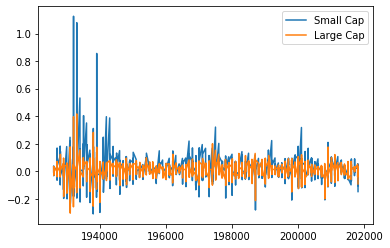

In [45]:
returns.plot()

In [58]:
returns.index


Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [61]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")

In [111]:
returns

,Small Cap,Large Cap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


In [100]:
returns = returns["1999":"2015"]
returns

,Lo 20,Hi 20
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048
...,...,...
2015-08,-0.0347,-0.0559
2015-09,-0.0610,-0.0333
2015-10,0.0385,0.0710
2015-11,0.0165,0.0015


In [101]:
returns.std()

Lo 20    0.066076
Hi 20    0.049858
dtype: float64

In [102]:
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

Lo 20    0.228894
Hi 20    0.172713
dtype: float64

In [103]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod()**(1/n_months) - 1
return_per_month

Lo 20    0.009069
Hi 20    0.005094
dtype: float64

In [104]:
annualized_return = (return_per_month + 1) ** 12 -1
annualized_return

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

### Calculating annulaized return in one step

In [105]:
annualized_return = (returns + 1).prod()**(12/n_months) - 1
annualized_return

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

In [106]:
annualized_return/annualized_vol

Lo 20    0.499909
Hi 20    0.363985
dtype: float64

In [107]:
risk_free_rate = 0.03 # Should be time-series of the risk free rate
excess_return = annualized_return - risk_free_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio


Lo 20    0.368844
Hi 20    0.190287
dtype: float64

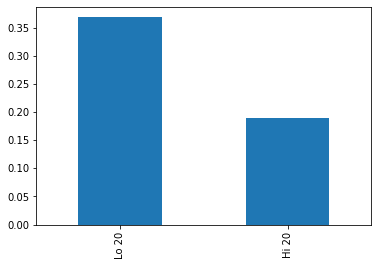

In [108]:
sharpe_ratio.plot.bar()